<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue">Module 1:</span> Exploratory Analysis</h1>
<hr>

Welcome to the workbook for <span style="color:royalblue">Module 1: Exploratory Analysis</span>!

Our goal with this step is to "get to know" the data. 
* Think of it like a "first date." 
* Try to learn as much about the data as possible, but don't invest too much time and get stuck on this step.
* You'll probably need to do ad-hoc data exploration later anyway, so you don't need to be 100% comprehensive right now.

<br><hr id="toc">

### In this module...

In this module, we'll go through the essential exploratory analysis steps:
1. [Basic information](#basic)
2. [Distributions of numeric features](#numeric)
3. [Distributions of categorical features](#categorical)
4. [Segmentations](#segmentations)
5. [Correlations](#correlations)

Along the way, we'll note the practical implications of our findings.

<br>
**(Reminder) To run a code cell...** 
1. Click anywhere in the cell to select it.
2. Press <code style="color:steelblue">Shift + Enter</code> to run the code.
3. You can insert new code cells using the **Insert** dropdown in the toolbar at the top.
<br><hr>

### First, let's import libraries and load the dataset.

In general, it's good practice to keep all of your library imports at the top of your notebook or program.

Before we do anything else, let's import the <code style="color:steelblue">print()</code> function from the future to ensure our code is compatible with Python 3.

In [ ]:
from __future__ import print_function  # Compatability with Python 3
print( 'Print function ready to serve.' )

Next, let's import the libraries we'll need for this module.

In [ ]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns
import datetime 

Next, let's import the dataset. 
* Pandas has a <code style="color:steelblue">pd.read_csv()</code> function for importing CSV files into a Pandas DataFrame. 
* You can name the DataFrame variable anything, but we prefer the simple name: <code style="color:steelblue">df</code> (short for DataFrame).

In [3]:
# Load real estate data from CSV
df = pd.read_csv('project_files/real_estate_data.csv')

Now we're ready to jump into exploring the data!

<br id="basic">
# 1. Basic information

First, always look at basic information about the dataset. 

<br>
Display the dimensions of the dataset.

In [4]:
# Dataframe dimensions
df.shape

(1883, 26)

Next, display the data types of our features.

In [5]:
# Column datatypes
df.dtypes

tx_price                int64
beds                    int64
baths                   int64
sqft                    int64
year_built              int64
lot_size                int64
property_type          object
exterior_walls         object
roof                   object
basement              float64
restaurants             int64
groceries               int64
nightlife               int64
cafes                   int64
shopping                int64
arts_entertainment      int64
beauty_spas             int64
active_life             int64
median_age            float64
married               float64
college_grad          float64
property_tax          float64
insurance             float64
median_school         float64
num_schools           float64
tx_year                 int64
dtype: object

Display the first 5 rows to see example observations.

In [6]:
# Display first 5 rows of df
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002


<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
## <span style="color:RoyalBlue">Exercise 1.1</span>

Before moving on, let's dig a bit deeper into some of these functionalities. Getting some extra practice right now will set you up for smoother success as you continue through the project.

<br>
**First, try to filter <code style="color:steelblue">df.dtypes</code> to only categorical variables.**
* **Tip:** Remember our boolean masks from the Python Crash Course?
* **Tip:** A Series can be filtered by boolean masks the same way that a DataFrame can be.

In [7]:
# Filter and display only df.dtypes that are 'object'
categoricals = df.dtypes[df.dtypes =='object']; categoricals

property_type     object
exterior_walls    object
roof              object
dtype: object

By the way, to actually get the **feature names** that you can iterate through, you have to access the <code style="color:steelblue">.index</code> attribute.

<br>
**Iterate through the categorical feature names and print each name.**
* **Tip:** Filter as you did above, and then call the <code style="color:steelblue">.index</code> attribute

In [8]:
# Loop through categorical feature names and print each one
for i in categoricals.index: print( i) 

property_type
exterior_walls
roof


As you'll see later, the ability to select feature names based on some condition (instead of manually typing out each one) will be quite useful.

<br>
**Next, look at a few more examples by displaying the first 10 rows of data, instead of just the first 5.**
* **Tip:** <code style="color:steelblue">df.head()</code> returns the first 5 rows by default, but you can pass in an integer argument for the number of rows you want.

In [9]:
# Display the first 10 rows of data
df.head(10)

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002
5,265000,1,1,641,1947,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,146,10,23,27,86,9,60,52,28.0,15.0,86.0,168.0,58.0,8.0,3.0,2004
6,240000,1,1,642,1944,0,Single-Family,Brick,NaN,NaN,159,13,36,17,92,12,66,50,28.0,36.0,88.0,176.0,61.0,7.0,3.0,2011
7,388100,1,1,650,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,198,9,38,25,127,11,72,83,36.0,25.0,91.0,266.0,92.0,9.0,3.0,2005
8,240000,1,1,660,1983,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,51,8,6,2,40,18,32,41,36.0,49.0,77.0,188.0,65.0,6.0,3.0,2013
9,250000,1,1,664,1965,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,119,10,26,25,183,13,70,36,57.0,13.0,83.0,147.0,51.0,6.0,3.0,2007


Finally, it's also helpful to look at the last 5 rows of data.
* Sometimes datasets will have **corrupted data** hiding at the very end (depending on the data source).
* It never hurts to double-check.

<br>
**Display the last 5 rows of data.**
* **Hint:** You've seen the "head," but what about the "tail?"

In [10]:
# Display last 5 rows of data
df.tail()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
1878,385000,5,6,6381,2004,224334,Single-Family,Stucco,Composition Shingle,1.0,0,0,0,0,3,0,0,1,46.0,76.0,87.0,1250.0,381.0,10.0,3.0,2002
1879,690000,5,6,6501,1956,23086,Single-Family,Brick,Composition Shingle,1.0,45,7,5,7,41,3,61,11,42.0,73.0,61.0,1553.0,473.0,9.0,3.0,2015
1880,600000,5,6,7064,1995,217800,Single-Family,Metal,Composition Shingle,1.0,5,1,1,1,8,2,1,2,43.0,87.0,66.0,942.0,287.0,8.0,1.0,1999
1881,759900,5,6,7500,2006,8886,Single-Family,Siding (Alum/Vinyl),Asphalt,1.0,18,2,4,0,5,1,8,6,43.0,61.0,51.0,803.0,245.0,5.0,2.0,2009
1882,735000,5,6,7515,1958,10497,Single-Family,Brick,Composition Shingle,1.0,0,0,0,1,2,2,0,5,37.0,80.0,86.0,1459.0,444.0,9.0,3.0,2015


<hr style="border-color:royalblue;background-color:royalblue;height:1px;">

<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
[Back to Contents](#toc)
</div>

<br id="numeric">
# 2. Distributions of numeric features

One of the most enlightening data exploration tasks is plotting the distributions of your features.

<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
## <span style="color:RoyalBlue">Exercise 1.2</span>

**Plot the histogram grid, but make it larger, and rotate the x-axis labels clockwise by 45 degrees.**
* <code style="color:steelblue">df.hist()</code> has a <code style="color:steelblue">figsize=</code> argument takes a tuple for figure size.
* Try making the figure size 14 x 14
* <code style="color:steelblue">df.hist()</code> has a <code style="color:steelblue">xrot=</code> argument rotates x-axis labels **counter-clockwise**.
* The [documentation](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.hist.html) is useful for learning more about the arguments to the <code style="color:steelblue">.hist()</code> function.
* **Tip:** It's ok to arrive at the answer through **trial and error** (this is often easier than memorizing the various arguments).

In [11]:
import plotly.plotly as py
import pandas as pd
import cufflinks as cf
import numpy as np
py.sign_in('jachiike.madubuko', '3Vn8l2ADjcGuPjws8weS')

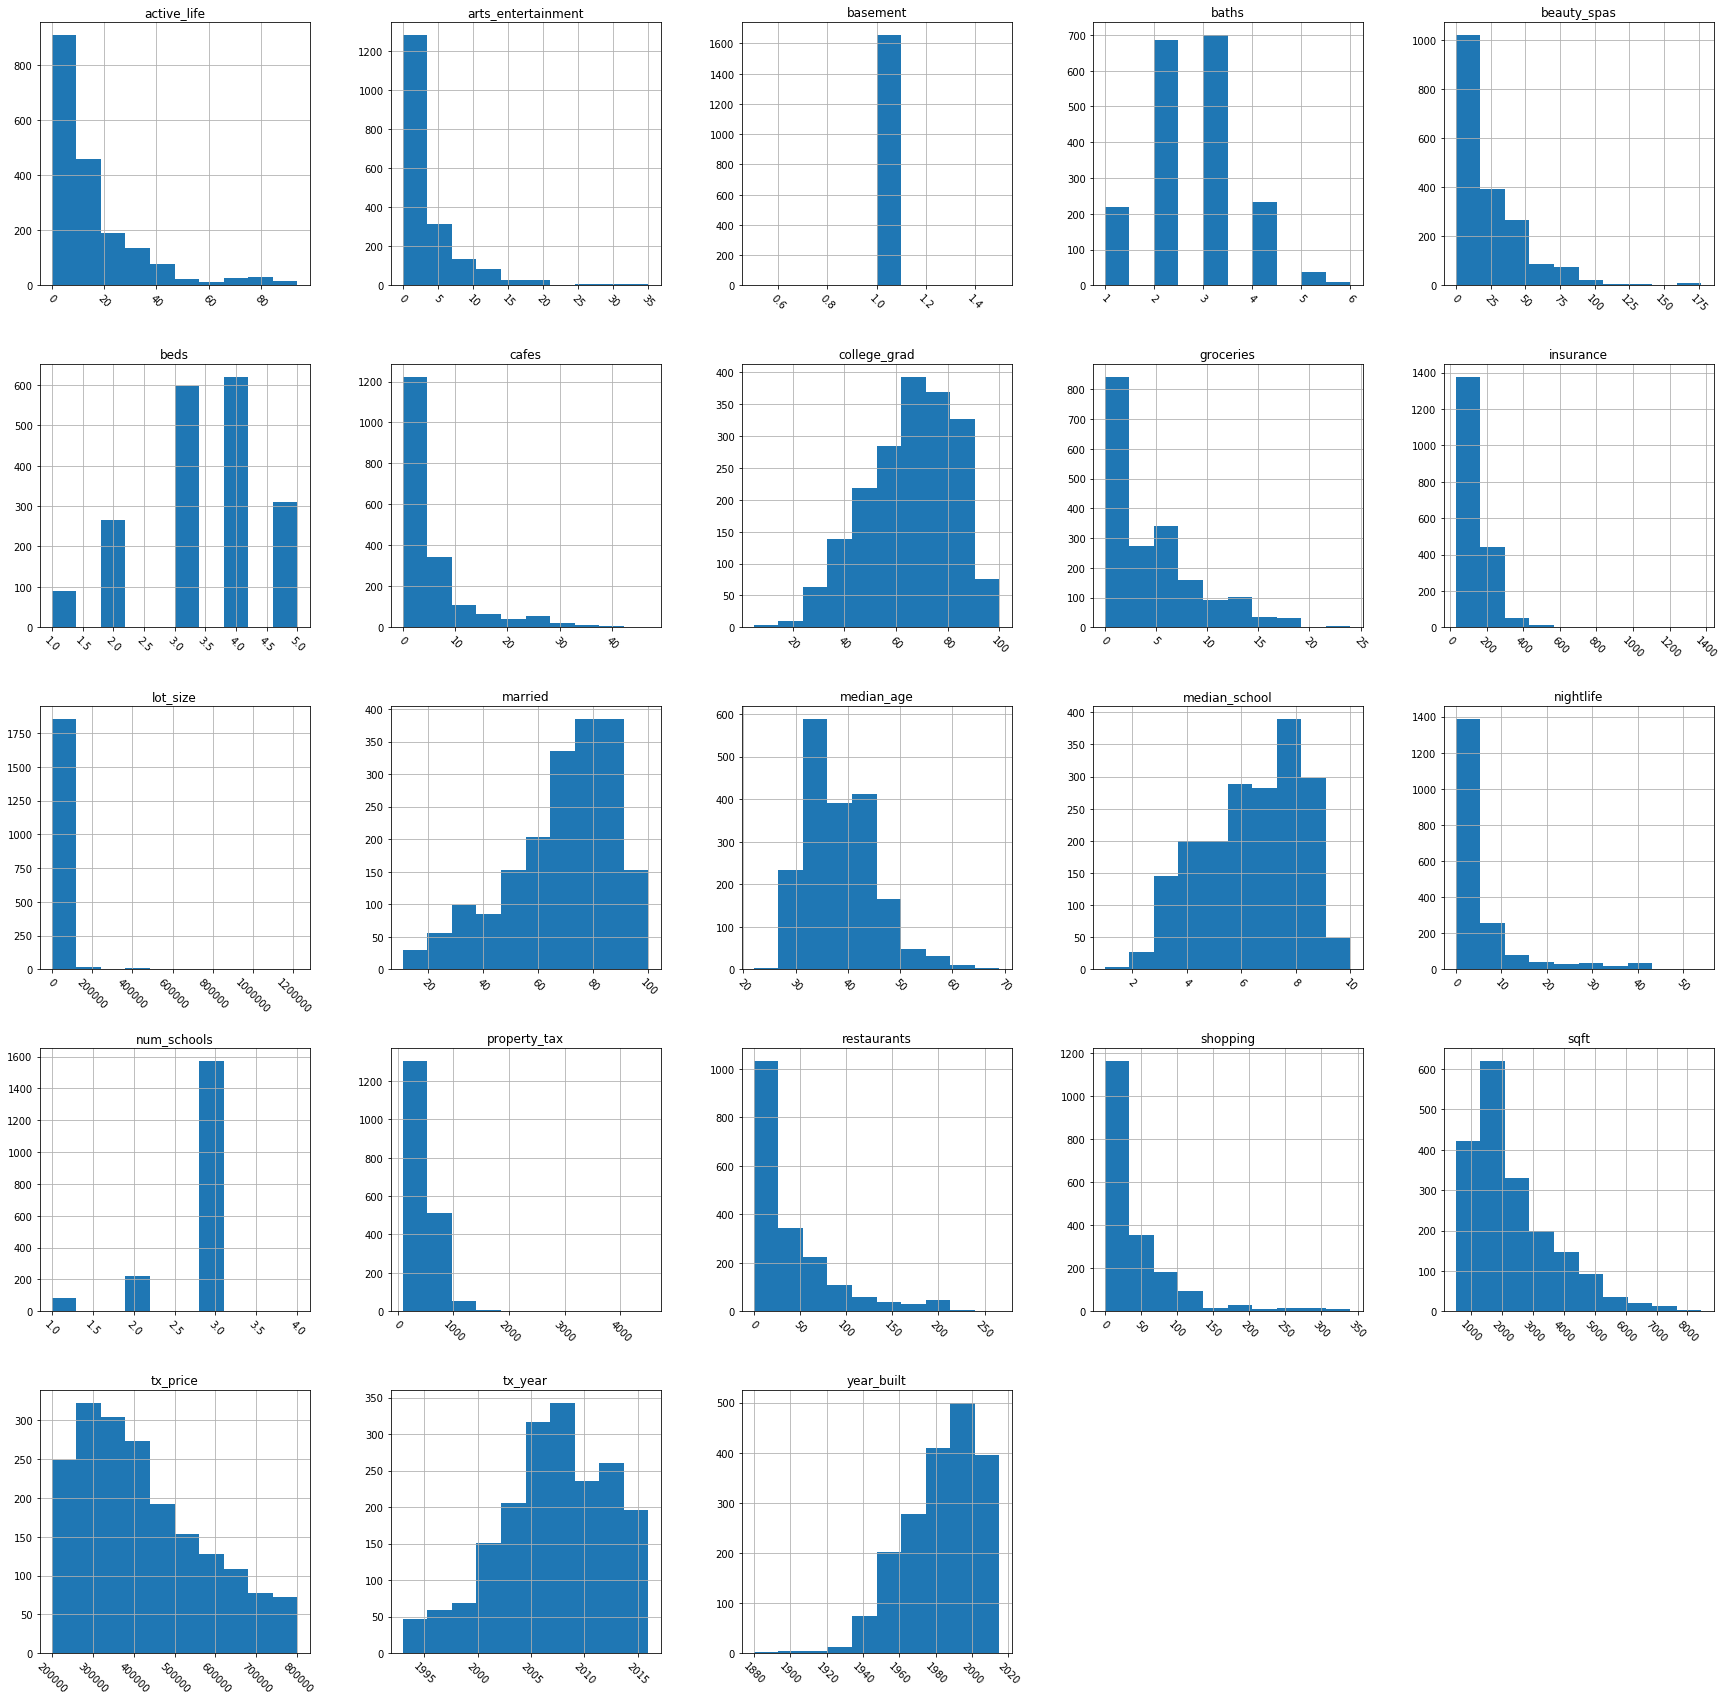

In [26]:
# Plot histogram grid
df.hist(figsize=(30,30), xrot=-45)

# Clear the text "residue"
plt.show()


<br>
Ah, much better.

<hr style="border-color:royalblue;background-color:royalblue;height:1px;">

Display summary statistics for the numerical features.

In [13]:
# Summarize numerical features
df.describe()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1.883000e+03,1657.0,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
mean,422839.807754,3.420605,2.579926,2329.398832,1982.963887,1.339262e+04,1.0,40.210303,4.505045,5.074881,5.325013,40.802443,3.394052,23.416888,15.835369,38.601168,69.091875,65.085502,466.777483,140.454063,6.502921,2.793415,2007.111524
std,151462.593276,1.068554,0.945576,1336.991858,20.295945,4.494930e+04,0.0,46.867012,4.491029,8.464668,7.539309,53.539296,4.699787,25.776916,17.667717,6.634110,19.659767,16.953165,231.656645,72.929765,1.996109,0.505358,5.196898
min,200000.000000,1.000000,1.000000,500.000000,1880.000000,0.000000e+00,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,11.000000,5.000000,88.000000,30.000000,1.000000,1.000000,1993.000000
25%,300000.000000,3.000000,2.000000,1345.000000,1970.000000,1.542000e+03,1.0,7.000000,1.000000,0.000000,0.000000,6.000000,0.000000,4.000000,4.000000,33.000000,58.000000,54.000000,320.000000,94.000000,5.000000,3.000000,2004.000000
50%,392000.000000,3.000000,3.000000,1907.000000,1986.000000,6.098000e+03,1.0,23.000000,3.000000,2.000000,3.000000,22.000000,2.000000,15.000000,10.000000,38.000000,73.000000,66.000000,426.000000,125.000000,7.000000,3.000000,2007.000000
75%,525000.000000,4.000000,3.000000,3005.000000,2000.000000,1.176100e+04,1.0,58.000000,7.000000,6.000000,6.000000,51.000000,5.000000,35.000000,21.000000,43.000000,84.000000,78.000000,569.000000,169.000000,8.000000,3.000000,2011.000000
max,800000.000000,5.000000,6.000000,8450.000000,2015.000000,1.220551e+06,1.0,266.000000,24.000000,54.000000,47.000000,340.000000,35.000000,177.000000,94.000000,69.000000,100.000000,100.000000,4508.000000,1374.000000,10.000000,4.000000,2016.000000


<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
[Back to Contents](#toc)
</div>

<br id="categorical">
# 3. Distributions of categorical features

Next, let's take a look at the distributions of our categorical features.

<br>
Display summary statistics for categorical features.

In [28]:
# Summarize categorical features
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
count,1883.000,1883.000,1883.000,1883.000,1883.000,1883.000,1657.000,1883.000,1883.000,1883.000,1883.000,1883.000,1883.000,1883.000,1883.000,1883.000,1883.000,1883.000,1883.000,1883.000,1883.000,1883.000,1883.000
mean,422839.808,3.421,2.580,2329.399,1982.964,13392.620,1.000,40.210,4.505,5.075,5.325,40.802,3.394,23.417,15.835,38.601,69.092,65.086,466.777,140.454,6.503,2.793,2007.112
std,151462.593,1.069,0.946,1336.992,20.296,44949.304,0.000,46.867,4.491,8.465,7.539,53.539,4.700,25.777,17.668,6.634,19.660,16.953,231.657,72.930,1.996,0.505,5.197
min,200000.000,1.000,1.000,500.000,1880.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,22.000,11.000,5.000,88.000,30.000,1.000,1.000,1993.000
25%,300000.000,3.000,2.000,1345.000,1970.000,1542.000,1.000,7.000,1.000,0.000,0.000,6.000,0.000,4.000,4.000,33.000,58.000,54.000,320.000,94.000,5.000,3.000,2004.000
50%,392000.000,3.000,3.000,1907.000,1986.000,6098.000,1.000,23.000,3.000,2.000,3.000,22.000,2.000,15.000,10.000,38.000,73.000,66.000,426.000,125.000,7.000,3.000,2007.000
75%,525000.000,4.000,3.000,3005.000,2000.000,11761.000,1.000,58.000,7.000,6.000,6.000,51.000,5.000,35.000,21.000,43.000,84.000,78.000,569.000,169.000,8.000,3.000,2011.000
max,800000.000,5.000,6.000,8450.000,2015.000,1220551.000,1.000,266.000,24.000,54.000,47.000,340.000,35.000,177.000,94.000,69.000,100.000,100.000,4508.000,1374.000,10.000,4.000,2016.000


Plot bar plot for the <code style="color:steelblue">'exterior_walls'</code> feature.

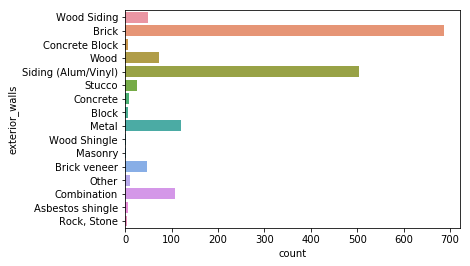

In [29]:
# Bar plot for 'exterior_walls'
sns.countplot(y='exterior_walls', data=df)

<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
## <span style="color:RoyalBlue">Exercise 1.3</span>

**Write a <code style="color:steelblue">for</code> loop to plot bar plots of each of the categorical features.**
* Write the loop to be able to handle any number of categorical features (borrow from your answer to <span style="color:royalblue">Exercise 1.1</span>).
* Invoke <code style="color:steelblue">plt.show()</code> after each bar plot to display all 3 plots in one output.
* Which features suffer from sparse classes?

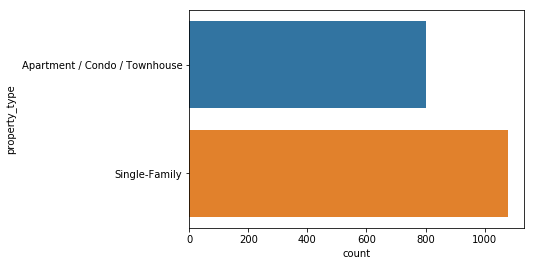

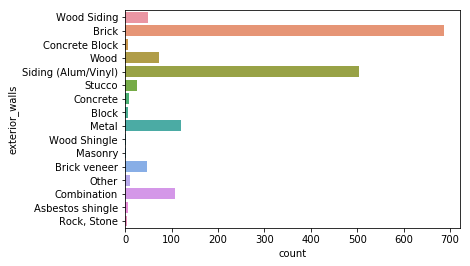

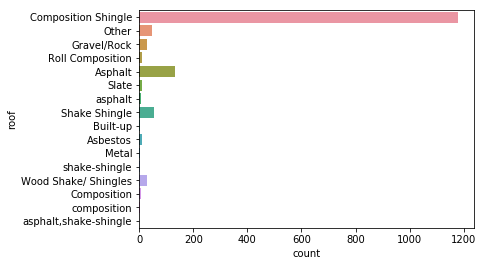

In [30]:
# Plot bar plot for each categorical feature

categoricals = df.dtypes[df.dtypes =='object']
for i in categoricals.index:
    sns.countplot(y=i, data=df)
    plt.show()

<hr style="border-color:royalblue;background-color:royalblue;height:1px;">

<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
[Back to Contents](#toc)
</div>

<br id="segmentations">
# 4. Segmentations

Next, let's create some segmentations. Segmentations are powerful ways to cut the data to observe the relationship between **categorical features** and **numeric features**.

<br>
Segment <code style="color:steelblue">'tx_price'</code> by <code style="color:steelblue">'property_type'</code> and plot the resulting distributions

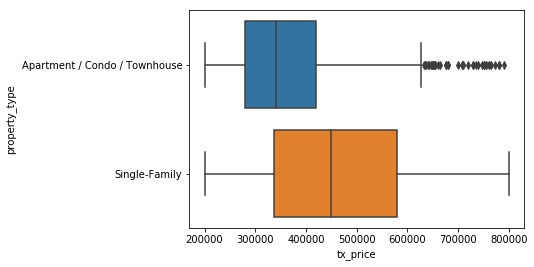

In [32]:
# Segment tx_price by property_type and plot distributions
sns.boxplot(y='property_type', x='tx_price', data=df)

Segment by <code style="color:steelblue">'property_type'</code> and calculate the average value of each feature within each class:

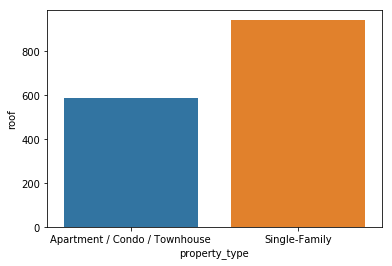

In [40]:
# Segment by property_type and display the means within each class
sns.barplot(x=df.groupby('property_type').count().index,y='roof', data=df.groupby('property_type').count())




<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
## <span style="color:RoyalBlue">Exercise 1.4</span>

On average, it looks like single family homes are more expensive.

How else do the different property types differ? Let's see:

<br>
**First, segment <code style="color:steelblue">'sqft'</code> by <code style="color:steelblue">'property_type'</code> and plot the boxplots.**

In [41]:
# Segment sqft by sqft and property_type distributions
df.groupby('property_type').mean()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
property_type,,,,,,,,,,,,,,,,,,,,,,,
Apartment / Condo / Townhouse,366614.035,2.601,2.200,1513.727,1988.936,3944.239,1.000,58.418,5.919,7.856,8.037,57.631,4.841,32.087,22.411,37.199,57.534,66.372,346.262,105.653,6.382,2.832,2007.941
Single-Family,464644.711,4.030,2.862,2935.866,1978.523,20417.667,1.000,26.672,3.454,3.007,3.308,28.290,2.319,16.970,10.946,39.644,77.685,64.129,556.383,166.330,6.593,2.765,2006.494


<br>
**After producing the plot, consider these questions:**
* Which type of property is larger, on average?
* Which type of property sees greater variance in sizes?
* Does the difference in distributions between classes make intuitive sense?

<br>
**Next, display the standard deviations of each feature alongside their means after performing a groupby.**
* This will give you a better idea of the variation within in feature, by class.
* **Tip:** Pass a list of metrics into the <code style="color:steelblue">.agg()</code> function, after performing your groupby.
* Check out the [documentation](http://pandas.pydata.org/pandas-docs/stable/groupby.html#applying-multiple-functions-at-once) for more help.

In [42]:
# Segment by property_type and display the means and standard deviations within each class
df.groupby('property_type').agg(['mean','std'])

tx_price             beds       baths        \
                                  mean        std  mean   std  mean   std   
property_type                                                               
Apartment / Condo / Townhouse   366614 121784.490 2.601 0.810 2.200 0.815   
Single-Family                   464644 157758.739 4.030 0.796 2.862 0.938   

                                  sqft          year_built         lot_size  \
                                  mean      std       mean    std      mean   
property_type                                                                 
Apartment / Condo / Townhouse 1513.727  556.286   1988.936 15.514  3944.239   
Single-Family                 2935.866 1422.871   1978.523 22.211 20417.667   

                                        basement       restaurants         \
                                    std     mean   std        mean    std   
property_type                                                               
Apartment / Condo / Townhouse 44284.169    1.000 0.000      58.418 54.344   
Single-Family                 44165.529    1.000 0.000      26.672 34.726   

                              groceries       nightlife        cafes        \
                                   mean   std      mean    std  mean   std   
property_type                                                                
Apartment / Condo / Townhouse     5.919 4.646     7.856 10.644 8.037 9.077   
Single-Family                     3.454 4.067     3.007  5.544 3.308 5.325   

                              shopping        arts_entertainment        \
                                  mean    std               mean   std   
property_type                                                            
Apartment / Condo / Townhouse   57.631 61.852              4.841 5.235   
Single-Family                   28.290 42.292              2.319 3.930   

                              beauty_spas        active_life         \
                                     mean    std        mean    std   
property_type                                                         
Apartment / Condo / Townhouse      32.087 26.910      22.411 21.058   
Single-Family                      16.970 22.872      10.946 12.599   

                              median_age       married        college_grad  \
                                    mean   std    mean    std         mean   
property_type                                                                
Apartment / Condo / Townhouse     37.199 6.907  57.534 20.373       66.372   
Single-Family                     39.644 6.226  77.685 13.868       64.129   

                                     property_tax         insurance         \
                                 std         mean     std      mean    std   
property_type                                                                
Apartment / Condo / Townhouse 17.096      346.262 142.292   105.653 47.118   
Single-Family                 16.790      556.383 244.352   166.330 77.816   

                              median_school       num_schools        tx_year  \
                                       mean   std        mean   std     mean   
property_type                                                                  
Apartment / Condo / Townhouse         6.382 1.942       2.832 0.455 2007.941   
Single-Family                         6.593 2.032       2.765 0.538 2006.494   

                                     
                                std  
property_type                        
Apartment / Condo / Townhouse 4.099  
Single-Family                 5.807

<hr style="border-color:royalblue;background-color:royalblue;height:1px;">
<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
[Back to Contents](#toc)
</div>

<br id="correlations">
# 5. Correlations

Finally, let's take a look at the relationships between **numeric features** and **other numeric features**.

<br>
Create a <code style="color:steelblue">correlations</code> dataframe from <code style="color:steelblue">df</code>.

In [43]:
# Calculate correlations between numeric features
df.corr()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
tx_price,1.000,0.384,0.389,0.470,0.033,0.131,nan,-0.038,-0.094,0.009,-0.001,-0.038,-0.021,-0.054,-0.001,0.126,0.200,0.269,0.535,0.533,0.176,-0.014,0.109
beds,0.384,1.000,0.645,0.691,-0.012,0.164,nan,-0.496,-0.421,-0.441,-0.464,-0.389,-0.442,-0.420,-0.487,0.134,0.643,-0.082,0.548,0.486,0.137,-0.124,-0.174
baths,0.389,0.645,1.000,0.682,0.206,0.133,nan,-0.350,-0.340,-0.307,-0.317,-0.260,-0.306,-0.282,-0.330,0.096,0.442,0.016,0.526,0.475,0.163,-0.088,-0.132
sqft,0.470,0.691,0.682,1.000,0.255,0.246,nan,-0.354,-0.371,-0.282,-0.301,-0.276,-0.293,-0.310,-0.333,0.110,0.480,0.065,0.660,0.594,0.221,-0.102,-0.236
year_built,0.033,-0.012,0.206,0.255,1.000,0.000,nan,-0.107,-0.222,-0.080,-0.102,-0.122,-0.195,-0.164,-0.135,-0.237,0.038,-0.014,-0.047,-0.110,0.156,-0.188,-0.043
lot_size,0.131,0.164,0.133,0.246,0.000,1.000,nan,-0.114,-0.119,-0.072,-0.098,-0.117,-0.067,-0.121,-0.093,0.099,0.122,-0.031,0.166,0.147,0.097,-0.032,-0.048
basement,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
restaurants,-0.038,-0.496,-0.350,-0.354,-0.107,-0.114,nan,1.000,0.701,0.927,0.938,0.819,0.727,0.868,0.882,-0.064,-0.616,0.214,-0.101,-0.020,-0.068,0.251,0.045
groceries,-0.094,-0.421,-0.340,-0.371,-0.222,-0.119,nan,0.701,1.000,0.565,0.603,0.526,0.503,0.627,0.575,-0.022,-0.509,-0.006,-0.160,-0.094,-0.355,0.273,0.116
nightlife,0.009,-0.441,-0.307,-0.282,-0.080,-0.072,nan,0.927,0.565,1.000,0.924,0.743,0.703,0.777,0.859,-0.029,-0.569,0.254,-0.054,0.025,-0.037,0.196,0.027


Visualize the correlation grid with a heatmap to make it easier to digest.

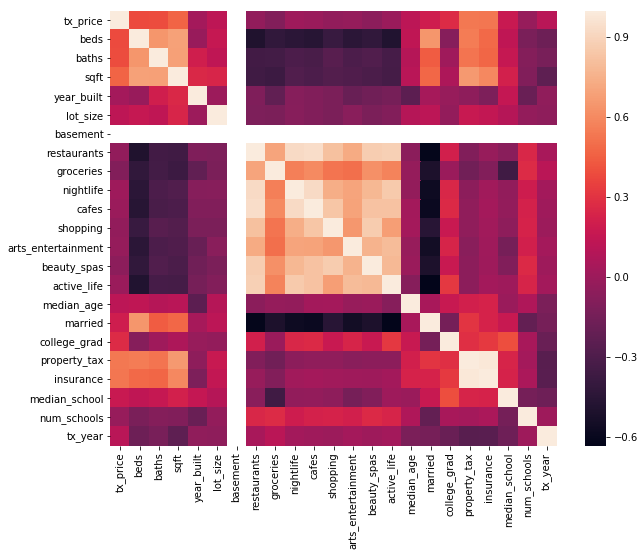

In [46]:
# Make the figsize 7 x 6
plt.figure(figsize=(10,8))

# Plot heatmap of correlations
sns.heatmap( data=df.corr())

<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
## <span style="color:RoyalBlue">Exercise 1.5</span>

When plotting a heatmap of correlations, it's often helpful to do four things:
1. Change the background to white. This way, 0 correlation will show as white
2. Annotate the cell with their correlations values
3. Mask the top triangle (less visual noise)
4. Drop the legend (colorbar on the side)

<br>
**First, change the background to white.**
* Seaborn has several different **themes**. The default theme is called <code style="color:crimson">'darkgrid'</code>.
* You can change the theme with <code style="color:steelblue">sns.set_style()</code>.
* You only need to run this once, and the theme will persist until you change it again.
* Change the theme to <code style="color:crimson">'white'</code>
* Make the figure size 10 x 8

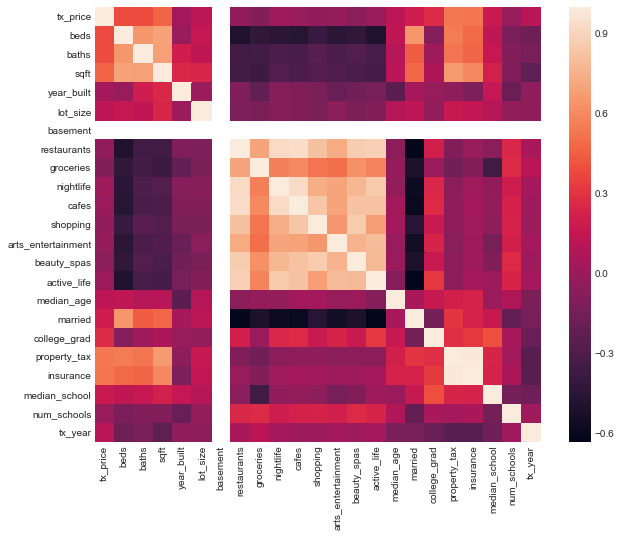

In [53]:
# Change color scheme
sns.set_style('white')
# Make the figsize 10 x 8
plt.figure(figsize=(10,8))

# Plot heatmap of correlations
sns.heatmap(df.corr())

See how the cells for <code style="color:steelblue">'basement'</code> are now white? That's what we want because they were not able to be calculated.

<br>
**Next, display the correlation values in each cell.**
* The <code style="color:steelblue">annot=</code> argument controls whether to annotate each cell with its value. By default, it's <code style="color:crimson">False</code>.
* To make the chart cleaner, multiply the <code style="color:steelblue">correlations</code> DataFrame by 100 before passing it to the heatmap function.
* Pass in the argument <code style="color:steelblue">fmt=<span style="color:crimson">'.0f'</span></code> to format the annotations to a whole number.

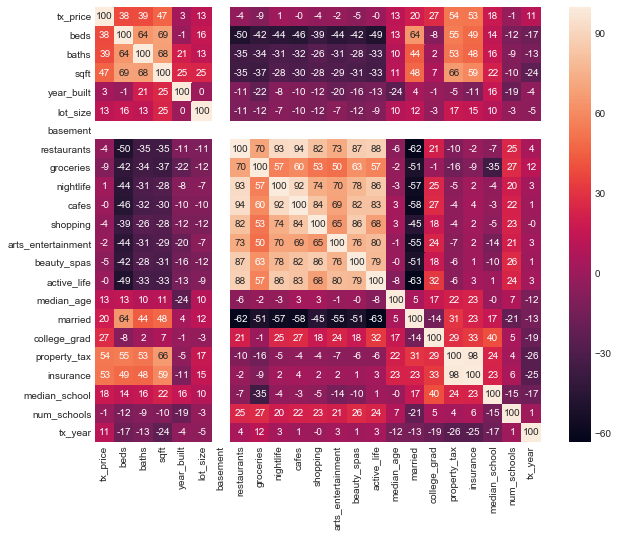

In [57]:
# Make the figsize 10 x 8
plt.figure(figsize=(10,8))
# Plot heatmap of annotated correlations
sns.heatmap(data=df.corr()*100, annot=True, fmt='.0f')

<br>
**Next, we'll generate a mask for the top triangle. Run this code:**

In [59]:
# Generate a mask for the upper triangle
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

<br>
**Plot the heatmap again, this time using that mask.**
* <code style="color:steelblue">sns.heatmap()</code> has a <code style="color:steelblue">mask=</code> argument.
* Keep all of the other styling changes you've made up to now.

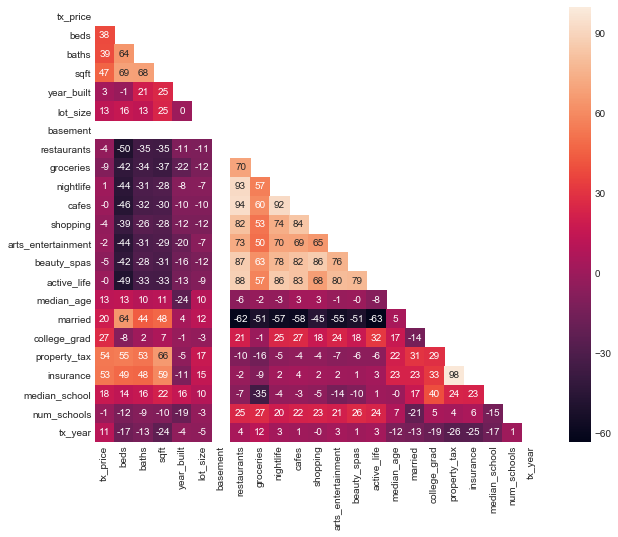

In [60]:
# Make the figsize 10 x 8
plt.figure(figsize=(10,8))
# Plot heatmap of correlations
sns.heatmap(data=df.corr()*100, annot=True, fmt='.0f', mask=mask)

<br>
**Finally, remove the colorbar on the side.**
* <code style="color:steelblue">sns.heatmap()</code> has a <code style="color:steelblue">cbar=</code> argument. By default, it's <code style="color:crimson">True</code>.
* Keep all of the other styling changes you've made up to now.
* But change the figure size to 9 x 8 (since we're removing the sidebar, this will help us keep nice proportions)

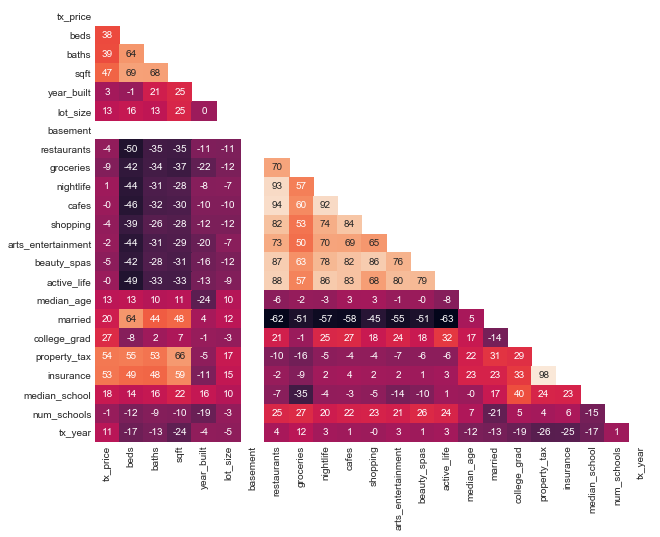

In [61]:

# Make the figsize 10 x 8
plt.figure(figsize=(10,8))
# Plot heatmap of correlations
sns.heatmap(data=df.corr()*100, cbar=False, annot=True, fmt='.0f', mask=mask)

<hr style="border-color:royalblue;background-color:royalblue;height:1px;">
<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
[Back to Contents](#toc)
</div>

<br>
## Next Steps

Congratulations for making it through Project 2's Exploratory Analysis!

Before powering on to the next module, we recommend going back and reviewing the charts you made. This time, since you've already created them, you can move through more quickly and really start to understand the **story** behind the data.

As a reminder, here are a few things you did in this module:
* You explored basic information about your dataset.
* You plotted distributions of numeric and categorical features.
* You segmented your dataset by <code style="color:steelblue">'property_type'</code>.
* And you visualized a heatmap of feature correlations.

As you work through the next module, <span style="color:royalblue">Module 2: Data Cleaning</span>, we recommend keeping this workbook open in a separate tab. It might be helpful to have your charts in front of you as you clean the data.

<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
[Back to Contents](#toc)
</div>